# Assignment 4: Linear Regression and Gradient Descent

## Collaboration Policy

This may be a group assignment. Please list the names of group members below if you choose to work with a group

**Collaborators**: *list  collaborators here*

## Scoring Breakdown

|Question|Points|
|---|---|
|1.a|10|
|1.b|10|
|2.a|10|
|2.b|10|
|2.c|10|
|2.d|10|
|2.e|10|
|3.a|20|
|3.b|10|
|**Total**|100|

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## Question 1. 
Suppose we create a linear model with parameters $\vec{\hat{\beta}}=[\hat{\beta}_0,...,\hat{\beta}_p]$
As we saw in lecture, such a model makes predictions $\hat{y}=\vec{\hat{\beta}}.\vec{x}=\sum{\hat{\beta}_ix_i}$ 


### 1.a. 
Suppose $\vec{\hat{\beta}}=[1,2,1]$ and e receive an observation $x = [4, 2, 1]$. What $\hat{y}$ value will
this model predict for the given observation?

### 1.b.
Suppose the correct $y$ was 6.1. What will be the L2 loss for our prediction $\hat{y}$ from question 1.a?

## Question 2.

The following function generates the dataset you need for the rest of the questions

In [9]:
def generate_dataset(gamma, std=1, num_samples=100, with_intercept=True):
    """
    This function generates a synthetic dataset based on a give gamma value

    !TODO: Finish doc string
    """
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std 
    intercept = -int(with_intercept) * 2
    Y = gamma * X + intercept + e
    #X=X.reshape(-1, 1)
    #Y=Y.reshape(-1, 1)
    data=pd.DataFrame({'X':X, 'Y':Y})
    return data

In [10]:
# Generate a dataset with a gamma value of 10
data = generate_dataset(gamma=10)

# Display the dataset
data

,X,Y
0,0.126176,0.291443
1,0.138396,-0.810497
2,0.460052,1.299751
3,0.245813,1.843950
4,0.839835,5.328526
...,...,...
95,0.597351,5.097254
96,0.062140,0.130397
97,0.033111,-0.983968
98,0.021275,-2.203091


### 2.a.

Using the following functions (gradient descent, mse_loss, and mse_loss_derivative), find the best value of gamma that the gradient descent algorithm can find in 100 iterations for initial gamma=0.1 and $\alpha=0.01$. 

In [11]:
# Initialize global variables
x=data['X']
y_obs=data['Y']

# NOTE: I changed 'df' to 'loss_derivative_func' as I kept confusing it with data frame
def gradient_descent(loss_derivative_func, initial_guess, alpha, n):
    """
    Perform gradient descent to find the minimum of a loss function

    Args:
        loss_derivative_func (function): Function that computes the derivative of the loss function
        initial_guess (float): Initial starting point
        alpha (float): Step size to take in each iteration
        n (int): Number of iterations to perform

    Returns:
        np.array: Array containing the sequence of guesses converging to the minimum
    """

    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        guess = guess - alpha * loss_derivative_func(guess)
        guesses.append(guess)
    return np.array(guesses)

def mse_loss(gamma):
    """
    Calculate the mean squared error loss for the model

    Args:
        gamma (float): The model parameter

    Returns:
        float: The mean squared error between the predicted and observed values
    """
    y_hat = gamma * x
    return np.mean((y_hat - y_obs) ** 2)  

def mse_loss_derivative(gamma):
    """
    Compute the derivative of the MSE loss function with respect to gamma

    Args:
        gamma (float): The model parameter

    Returns:
        float: The derivative of the MSE loss function
    """
    y_hat = gamma * x
    return np.mean(2 * (y_hat - y_obs) * x)

In [12]:
# Initialize gamma for GD ; initial starting point
initial_gamma = 0.1

# Initialize alpha for GD ; determines the size of steps to take toward the minimum
alpha = 0.01

# Initialize the number of iterations to perform
iterations = 100

# Run the GD algorithm to find the optimal value of gamma.
# NOTE: `gradient_descent` takes the derivative function `mse_loss_derivative` and calls it within the function
gammas = gradient_descent(mse_loss_derivative, initial_gamma, alpha, iterations)

# Retrieve the last value from the list of gamma values which is the value of gamma after the final iteration
best_gamma = gammas[-1] 

# Print the best gamma
best_gamma


3.5635760702635455

### 2.b.
Create a plot below showing the fitted simple linear regression model on the observed data for when you pick the gamma selected by the above algorithm. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- An appropriate title, a legend labeling which line does not contain an intercept, and labels for both axes

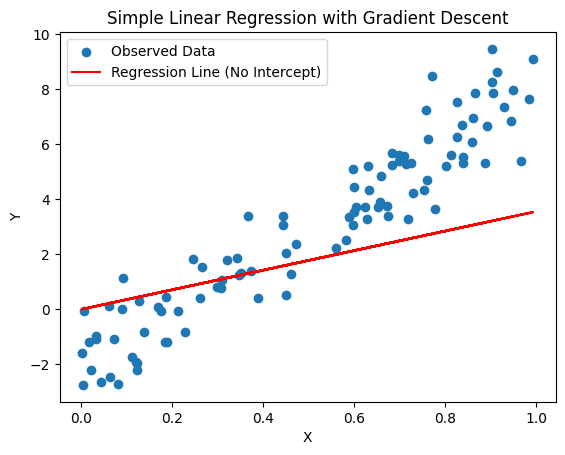

In [13]:
# Create a plot of the observed data
plt.scatter(x, y_obs, label='Observed Data')

# Create a regression line
y_pred = best_gamma * x
plt.plot(x, y_pred, color='red', label='Regression Line (No Intercept)')

# Add titles and labels
plt.title('Simple Linear Regression with Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()


### 2.c.

Use a different value of $\alpha=0.1$ and repeat 2.a and 2.b.


In [14]:
# Initialize gamma for GD ; initial starting point
initial_gamma = 0.1

# Initialize alpha for GD ; determines the size of steps to take toward the minimum
# NOTE: Changed alpha
alpha = 0.1

# Initialize the number of iterations to perform
iterations = 100

# Run the GD algorithm to find the optimal value of gamma.
# NOTE: `gradient_descent` takes the derivative function `mse_loss_derivative` and calls it within the function
gammas = gradient_descent(mse_loss_derivative, initial_gamma, alpha, iterations)

# Retrieve the last value from the list of gamma values which is the value of gamma after the final iteration
best_gamma = gammas[-1] 

# Print the best gamma
best_gamma

7.014321495970264

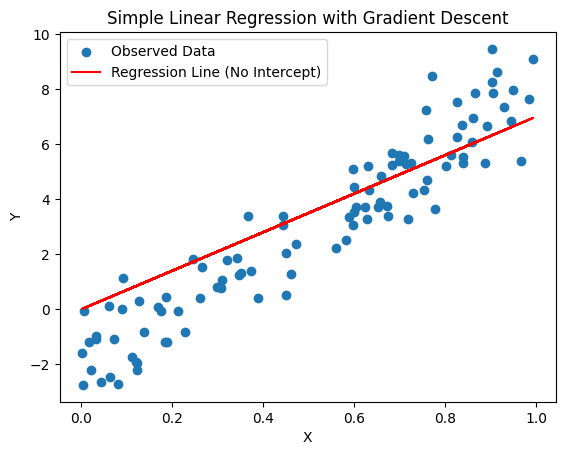

In [15]:
# Create a plot of the observed data
plt.scatter(x, y_obs, label='Observed Data')

# Create a regression line
y_pred = best_gamma * x
plt.plot(x, y_pred, color='red', label='Regression Line (No Intercept)')

# Add titles and labels
plt.title('Simple Linear Regression with Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()


### 2.d.
Which value of $\alpha$ resulted in a better model? Why? 

## 2.e.

What other inputs of the gradient_descent function can we change to imporove the model?

## Question 3.

### 3.a. 
Write a calculate_y_hat(X, Y, with_intercept) function that computes the value of y_hat for your model based on whether or not an intercept term is specified within the model.

Hint: Use sklearn.linear_model.LinearRegression library

### 3.b.

Create a plot below comparing our fitted simple linear regression model on the observed data for when it includes an intercept v.s. when it does not include an intercept. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- A line plot for the simple linear regression model with an intercept
- An appropriate title, a legend labeling which line contains and does not contain an intercept, and labels for both axes

You should use different colors for the two line plots